In [25]:
import kagglehub

path = kagglehub.dataset_download("alphiree/cardiovascular-diseases-risk-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cardiovascular-diseases-risk-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/cardiovascular-diseases-risk-prediction-dataset


In [26]:
import pandas as pd

df = pd.read_csv(path + "/CVD_cleaned.csv")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [28]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [29]:
df.isna().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


## Data Quality Checks
Check missing values


In [30]:
df.isna().sum()


,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


In [31]:
df.duplicated().sum()

np.int64(80)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.shape

(308774, 19)

Q1. What is the distribution of the target variable?

Is the dataset balanced or imbalanced?

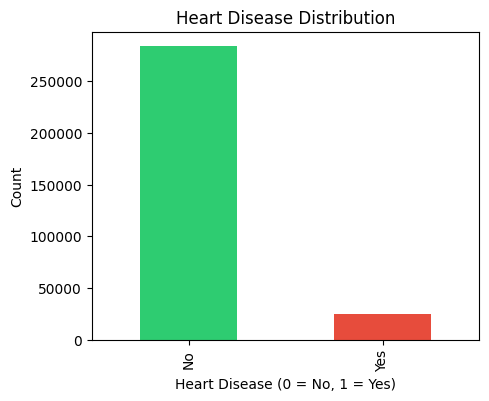

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
df['Heart_Disease'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

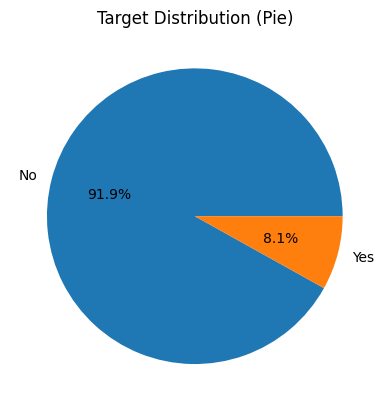

In [36]:
df['Heart_Disease'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Target Distribution (Pie)')
plt.show()

## Class Balance Analysis


In [37]:
class_dist = df['Heart_Disease'].value_counts()
class_dist_pct = (class_dist / len(df) * 100).round(2)
print("Heart_Disease Distribution:")
print(pd.DataFrame({'count': class_dist, 'percentage': class_dist_pct}))


Heart_Disease Distribution:
                count  percentage
Heart_Disease                    
No             283803       91.91
Yes             24971        8.09


In [38]:
ages_check=df["Age_Category"].value_counts()
ages_check

,count
Age_Category,
65-69,33425
60-64,32409
70-74,31099
55-59,28048
50-54,25090
80+,22269
40-44,21587
45-49,20963
75-79,20699


Q2: How does heart disease vary by gender?

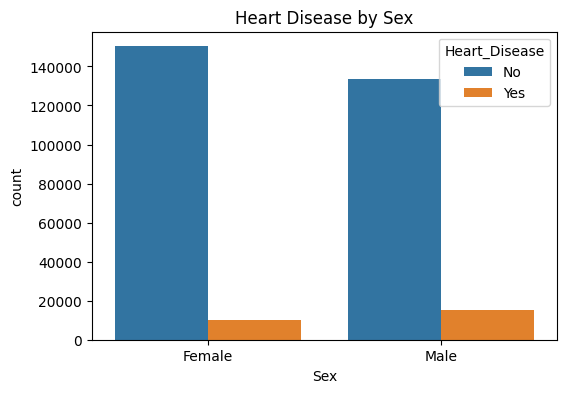

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="Heart_Disease")
plt.title("Heart Disease by Sex")
plt.show()

How does the risk of heart disease vary across age categories? E.g. does older age correlate strongly with disease?


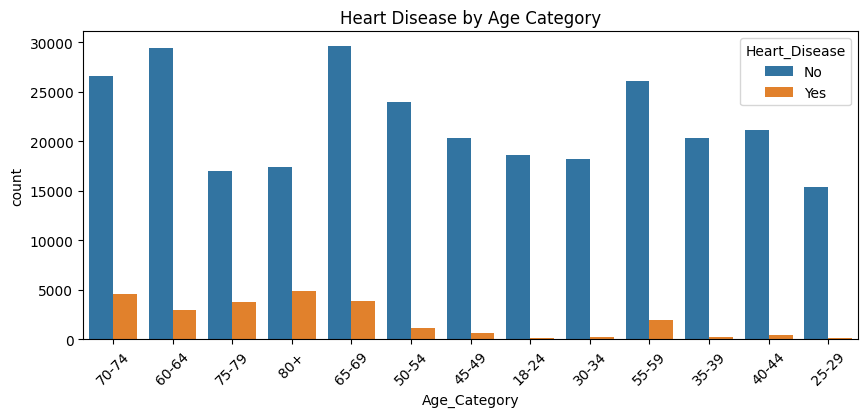

In [40]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Age_Category", hue="Heart_Disease")
plt.title("Heart Disease by Age Category")
plt.xticks(rotation=45)
plt.show()

What are the distributions of BMI, weight, and height? Are there outliers or extreme values?

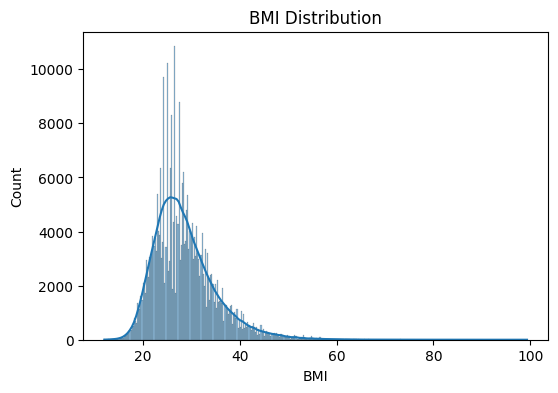

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(df["BMI"], kde=True)
plt.title("BMI Distribution")
plt.show()

BMI vs Heart Disease

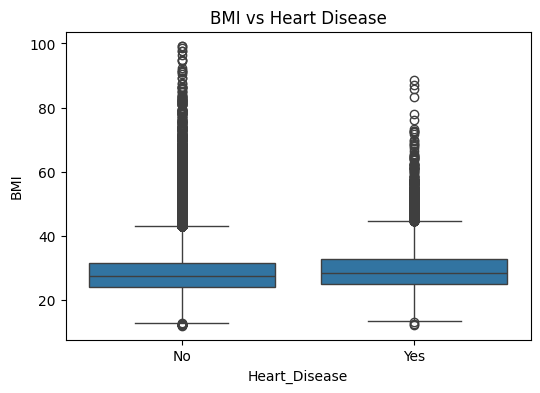

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Heart_Disease", y="BMI")
plt.title("BMI vs Heart Disease")
plt.show()

How lifestyle Factors distribute in Heart Disease

We focus on:

exercise

smoking_history

alcohol_consumption

fruit_consumption

green_vegetables_consumption

friedpotato_consumptio

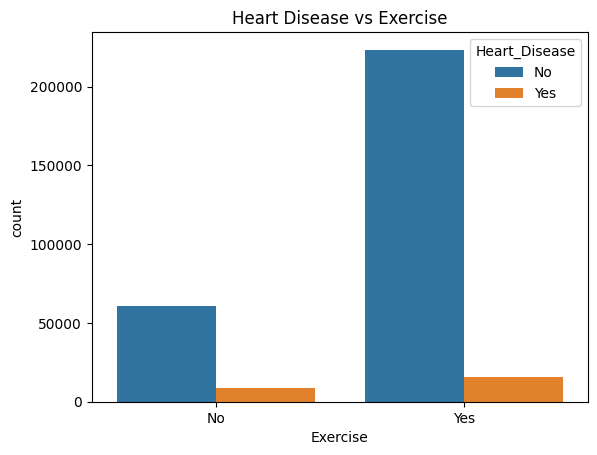

In [43]:
sns.countplot(data=df, x="Exercise", hue="Heart_Disease")
plt.title("Heart Disease vs Exercise")
plt.show()

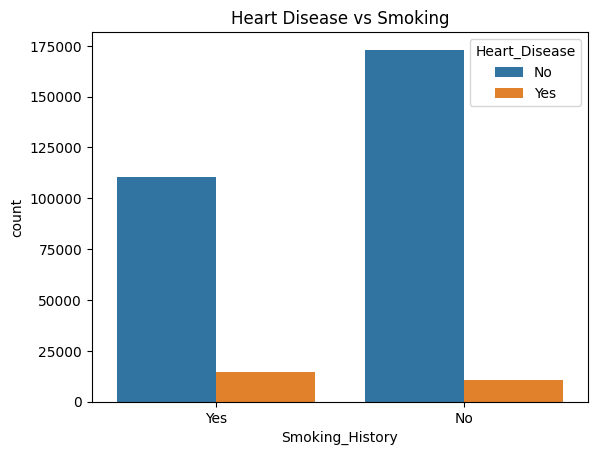

In [44]:
sns.countplot(data=df, x="Smoking_History", hue="Heart_Disease")
plt.title("Heart Disease vs Smoking")
plt.show()

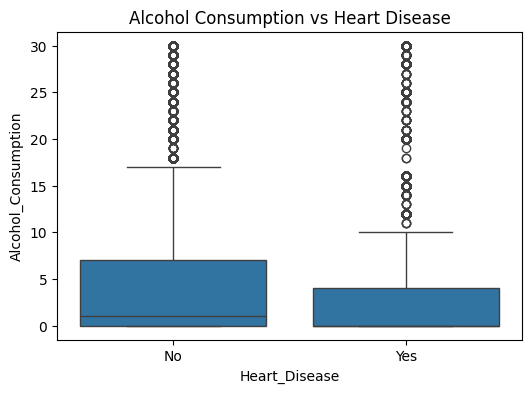

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Heart_Disease", y="Alcohol_Consumption")
plt.title("Alcohol Consumption vs Heart Disease")
plt.show()

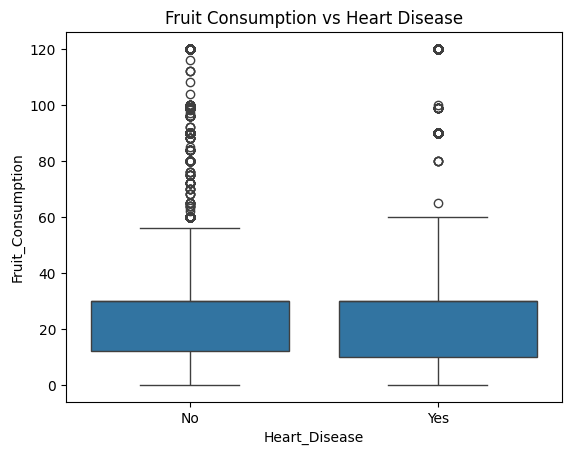

In [46]:
sns.boxplot(data=df, x="Heart_Disease", y="Fruit_Consumption")
plt.title("Fruit Consumption vs Heart Disease")
plt.show()

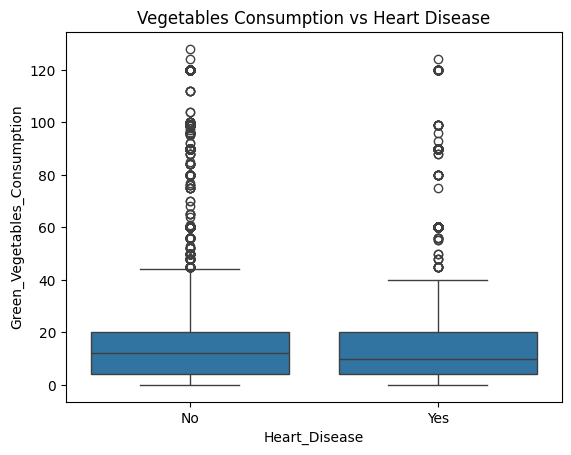

In [47]:
sns.boxplot(data=df, x="Heart_Disease", y="Green_Vegetables_Consumption")
plt.title("Vegetables Consumption vs Heart Disease")
plt.show()

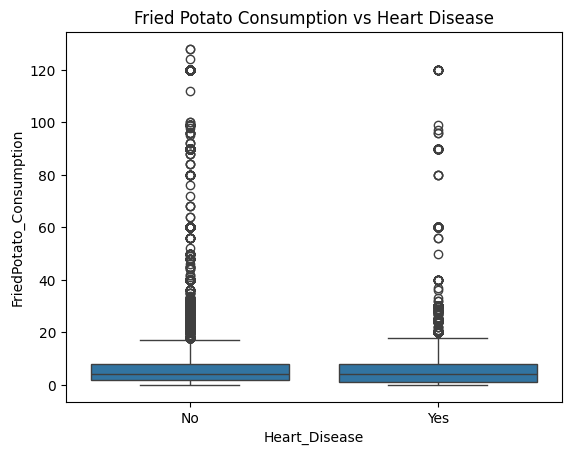

In [48]:
sns.boxplot(data=df, x="Heart_Disease", y="FriedPotato_Consumption")
plt.title("Fried Potato Consumption vs Heart Disease")
plt.show()

How do comorbidities also affect Heart Disease

(diabetes, arthritis, depression, skin_cancer, other_cancer)

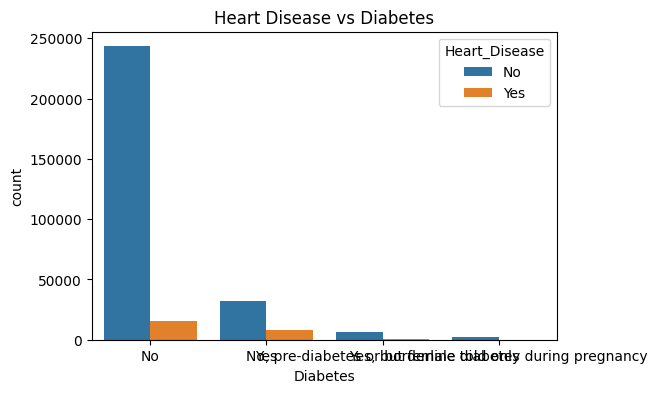

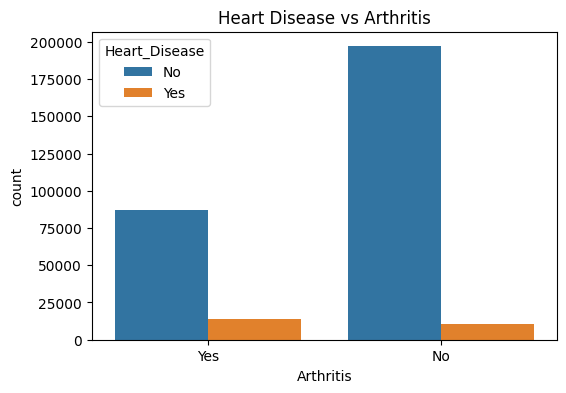

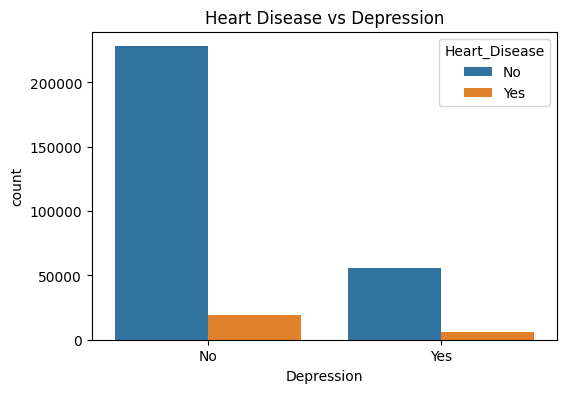

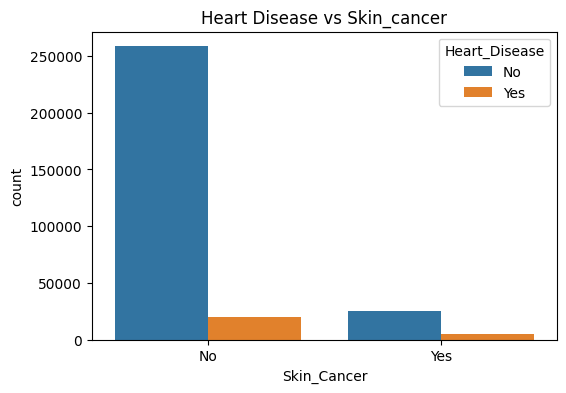

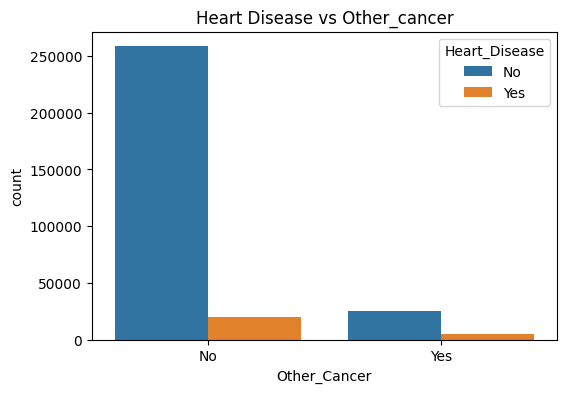

In [67]:
comorbidities = ["Diabetes", "Arthritis", "Depression", "Skin_Cancer", "Other_Cancer"]

for col in comorbidities:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Heart_Disease")
    plt.title(f"Heart Disease vs {col.capitalize()}")
    plt.show()

## Outlier Detection (using IQR)


In [51]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Outlier Summary (IQR method):\n")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if outliers > 0:
        print(f"{col}: {outliers} outliers ({outliers/len(df)*100:.2f}%)")


Outlier Summary (IQR method):

Height_(cm): 1055 outliers (0.34%)
Weight_(kg): 7326 outliers (2.37%)
BMI: 9530 outliers (3.09%)
Alcohol_Consumption: 36147 outliers (11.71%)
Fruit_Consumption: 68212 outliers (22.09%)
Green_Vegetables_Consumption: 11877 outliers (3.85%)
FriedPotato_Consumption: 19456 outliers (6.30%)


Q7: Correlation Heatmap

(Only numeric columns → weight, height, BMI, diet quantities)

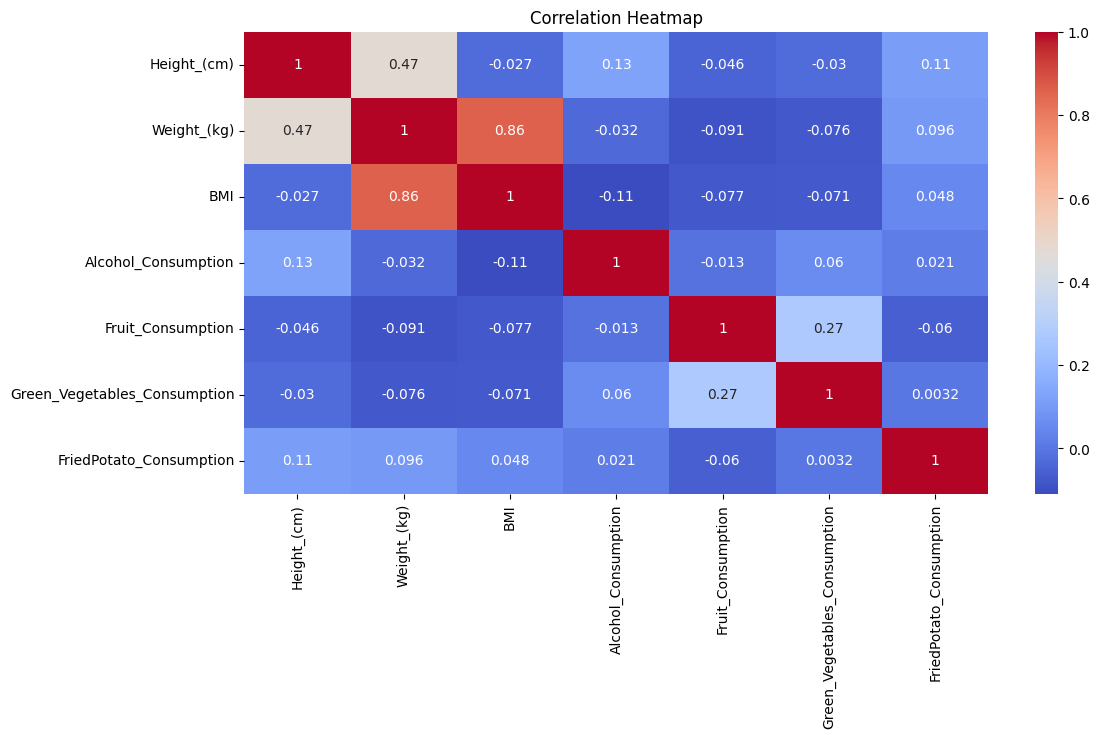

In [52]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [53]:
df_encoded = df.copy()

binary_cols = [
    "Exercise","Heart_Disease","Skin_Cancer","Other_Cancer","Depression","Diabetes",
    "Arthritis","Smoking_History"
]

for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({"Yes":1, "No":0, "No ":0, "NO":0, "YES":1}).fillna(0)

df_encoded["Sex"] = df_encoded["Sex"].map({"Female":0, "Male":1})

age_order = {
    "18-24":1,"25-29":2,"30-34":3,"35-39":4,"40-44":5,
    "45-49":6,"50-54":7,"55-59":8,"60-64":9,"65-69":10,"70-74":11,"75-79":12,"80+":13
}
df_encoded["Age_Category"] = df_encoded["Age_Category"].map(age_order)

checkup_map = {
    "Within the past year":1,
    "Within the past 2 years":2,
    "Within the past 5 years":3,
    "5 or more years ago":4,
    "Never":5
}
df_encoded["Checkup"] = df_encoded["Checkup"].map(checkup_map)

general_health_map = {
    "Excellent": 5,
    "Very Good": 4,
    "Good": 3,
    "Fair": 2,
    "Poor": 1
}

df_encoded["General_Health"] = df_encoded["General_Health"].map(general_health_map)

df_encoded.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,2,0,0,0,0,0,0.0,1,0,11,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,1,0,1,0,0,0,1.0,0,0,11,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,1,1,0,0,0,0,1.0,0,0,9,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,1,1,0,0,0,1.0,0,1,12,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,1,0,0,0,0,0,0.0,0,1,13,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [54]:
import scipy.stats as stats

categorical_cols = [
    "Sex","Exercise","Smoking_History","Diabetes","Depression",
    "Arthritis","Skin_Cancer","Other_Cancer","Checkup"
]

chi_results = {}

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df["Heart_Disease"])
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    chi_results[col] = p

chi_results

{'Sex': np.float64(0.0),
 'Exercise': np.float64(0.0),
 'Smoking_History': np.float64(0.0),
 'Diabetes': np.float64(0.0),
 'Depression': np.float64(8.205678403288834e-73),
 'Arthritis': np.float64(0.0),
 'Skin_Cancer': np.float64(0.0),
 'Other_Cancer': np.float64(0.0),
 'Checkup': np.float64(0.0)}

In [56]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Heart_Disease", axis=1)
y = df_encoded["Heart_Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7854748603351955
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     56761
           1       0.20      0.57      0.30      4994

    accuracy                           0.79     61755
   macro avg       0.58      0.69      0.59     61755
weighted avg       0.89      0.79      0.83     61755



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15)

,0
General_Health,0.184820
Diabetes,0.136900
Age_Category,0.122189
FriedPotato_Consumption,0.074993
BMI,0.064817
Height_(cm),0.064171
Weight_(kg),0.062048
Alcohol_Consumption,0.057016
Green_Vegetables_Consumption,0.050875
Fruit_Consumption,0.044498


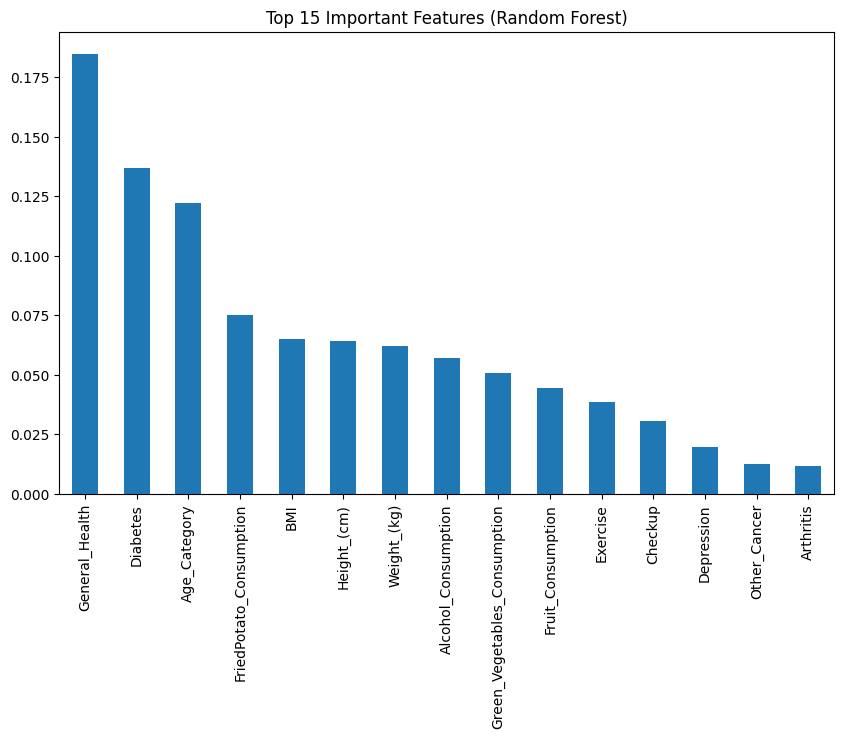

In [60]:
plt.figure(figsize=(10,6))
importances.sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Top 15 Important Features (Random Forest)")
plt.show()

## Advanced Model Metrics (Precision, Recall, AUC)


In [62]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc

lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

print("=" * 50)
print("LOGISTIC REGRESSION - Metrics")
print("=" * 50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"AUC-ROC:   {lr_auc:.4f}")

y_pred_rf = rf.predict(X_test)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("\n" + "=" * 50)
print("RANDOM FOREST - Metrics")
print("=" * 50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"AUC-ROC:   {rf_auc:.4f}")

LOGISTIC REGRESSION - Metrics
Accuracy:  0.7855
Precision: 0.2034
Recall:    0.5669
F1-Score:  0.2994
AUC-ROC:   0.7667

RANDOM FOREST - Metrics
Accuracy:  0.8933
Precision: 0.2773
Recall:    0.1988
F1-Score:  0.2316
AUC-ROC:   0.7948


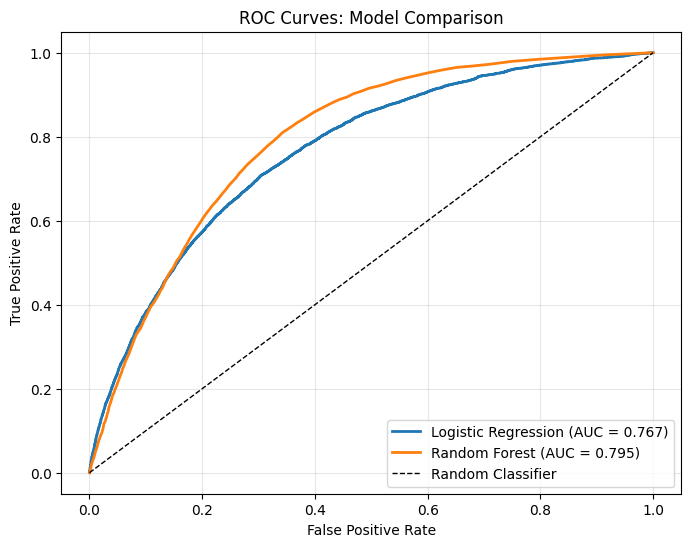

In [63]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Model Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


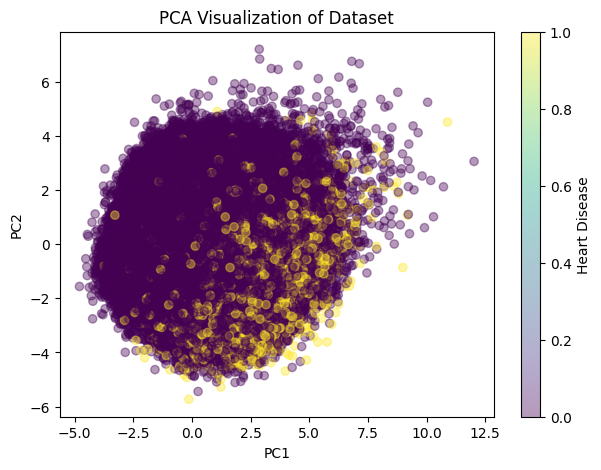

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=y, alpha=0.4)
plt.title("PCA Visualization of Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Heart Disease")
plt.show()

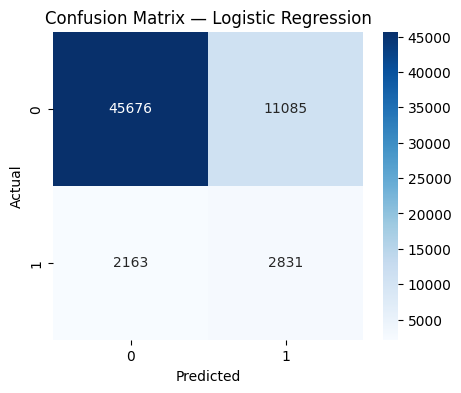

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()